This notebook investigates pre-burst and non-burst spacial spike windows of size 5, 10, 50, 100, and 500. It: 

* Calculates mean and standard deviation of the areas of the bounding boxes enclosing pre-burst and non-burst spike coordinates.
* Plots a histogram of the areas
* Plots scatter plots of the spike coordinates

Author: Mariia Lundvall (lundvm@uw.edu) <br>
Date: 01/21/2019

In [2]:
from tqdm import tqdm_notebook as tqdm
from random import randint
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<b> NOTE: Update the paths prior to running this notebook.  <b>

In [3]:
# Paths to the files contaning training data
# These files are created by the 01_get_training_data notebook
filename5 = '/home/NETID/lundvm/data/train_data/space_5.csv'
filename10 = '/home/NETID/lundvm/data/train_data/space_10.csv'
filename50 = '/home/NETID/lundvm/data/train_data/space_50.csv'
filename100 = '/home/NETID/lundvm/data/train_data/space_100.csv'
filename500 = '/home/NETID/lundvm/data/train_data/space_500.csv'

# csv file contaning neuron data
# The file should contain x and y coordinates and the type (starter or non-starter) of neurons
neurons_csv = '/home/NETID/lundvm/data/neurons.csv'

In [3]:
def get_window_size(filename):
    """
    Extracts the window size from the filename. The filename must be in a form: typeofdata_window.csv, 
    e.g. temp_5.csv or space_100.csv These files are produced by the 01_get_training_data notebook. 

    Args:
        filename(str): the name the file

    Returns:
        int: window size
    """

    if filename[-8] == '_':
        return int(filename[-7:-4])
    elif filename[-6] == '_':
        return int(filename[-5])
    else:
        return int(filename[-6:-4])

    return None

In [4]:
def prepare_data(filename):
    """
    Prepares data for plotting. Reads in a file with the spacial data into a dataframe, 
    removes the labels, and creates two 2d arrays (pre-bursts and non-bursts) for plotting.

    Args:
        filename(str): the name of the file to process

    Returns:
        pre_bursts(2d numpy array): array with the pre-burst data
        non_bursts(2d numpy array): array with the non-burst data
    """
    window_size = get_window_size(filename)*2

    data = pd.read_csv(filename, header=None, dtype='int')
    pre_bursts = data[data[window_size] == 1].drop(window_size, axis=1).values
    non_bursts = data[data[window_size] == 0].drop(window_size, axis=1).values

    return pre_bursts, non_bursts

In [5]:
def plot_scatter(data, window_size, plot_title):
    """
    Creates a scatter plot of the given data. All examples are plotted on the same figure.

    Args:
        data(2d numpy array): array with the data to plot
        window_size(int): window size
        plot(title): plot title

    Returns:
        none
    """

    plt.figure(figsize=(10, 10))
    plt.yticks(np.arange(0, 100, 10))
    plt.xticks(np.arange(0, 100, 10))
    plt.axis([0, 100, 0, 100])
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    plt.title(plot_title)
    for i in tqdm(range(data.shape[0])):
        t = data[i].reshape(window_size, 2)
        plt.scatter(t[:, 0], t[:, 1], s=1, color=[0, 0, 0])

    plt.show()

In [6]:
def plot_single_scatter(data, window_size, plot_title, s=1):
    """
    Creates a scatter plot of one example from the given data.

    Args:
        data(2d numpy array): array with the data to plot
        window_size(int): window size
        plot(title): plot title

    Returns:
        none
    """

    plt.figure(figsize=(10, 10))
    plt.yticks(np.arange(0, 100, 10))
    plt.xticks(np.arange(0, 100, 10))
    plt.axis([0, 100, 0, 100])
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    plt.title(plot_title)
    t = data[randint(0, window_size)].reshape(window_size, 2)
    plt.scatter(t[:, 0], t[:, 1], s=s, color=[0, 0, 0])

    plt.show()

In [7]:
def bounding_box_area(data, window_size):
    """
    Calculate the area of a bounding box enclosing spike coordinates.

    Args:
        data(1d numpy array): array containg x and y coordinates of spikes
        window_size(int): spike window size

    Returns:
        area(float): the area of the bounding box
    """
    data = data.reshape(window_size, 2)
    area = (np.max(data[:, 0]) - np.min(data[:, 0])) * \
        (np.max(data[:, 1]) - np.min(data[:, 1]))

    return area

In [8]:
def area_mean_std(pre_bursts, non_bursts, window_size):
    """
    Calculates mean and standard deviation of the areas of bounding boxes enclosing spike coordinates.

    Args:
        pre_bursts(2d numpy array): array containing pre-burst data
        non_bursts(2d numpy array): array containing non_burst data
        window_size(int): window size

    Returns:
        nb_mean(float): mean of non-burst areas
        nb_std(float): standard deviation of non-burst areas
        pb_mean(float): mean of pre-burst areas
        pb_std(float): standard deviation of pre-burst areas
    """

    pb_areas = []
    nb_areas = []

    for i in range(pre_bursts.shape[0]):
        pb_areas.append(bounding_box_area(pre_bursts[i], window_size))
    pb_areas = np.array(pb_areas)

    for i in range(non_bursts.shape[0]):
        nb_areas.append(bounding_box_area(non_bursts[i], window_size))
    nb_areas = np.array(nb_areas)

    nb_mean = np.mean(nb_areas)
    nb_std = np.std(nb_areas)
    pb_mean = np.mean(pb_areas)
    pb_std = np.std(pb_areas)

    return nb_mean, nb_std, pb_mean, pb_std

In [9]:
def plot_area_histogram(pre_bursts, non_bursts, window_size):
    """
    Plots a histogram of the areas of bounding boxes enclosing spike coordinates.

    Args:
        pre_bursts(2d numpy array): array containing pre-burst data
        non_bursts(2d numpy array): array containing non_burst data
        window_size(int): window size

    Returns:
        none
    """
    pb_areas = []
    nb_areas = []

    for i in range(pre_bursts.shape[0]):
        pb_areas.append(bounding_box_area(pre_bursts[i], window_size))

    for i in range(non_bursts.shape[0]):
        nb_areas.append(bounding_box_area(non_bursts[i], window_size))

    fig, axs = plt.subplots(2, figsize=(10, 15), sharex=True)
    axs[0].hist(pb_areas)
    axs[1].hist(nb_areas)
    axs[0].set_title('Pre-bursts')
    axs[1].set_title('Non-bursts')
    axs[1].set_xlabel('Area')
    axs[0].set_xlabel('Area')
    axs[1].set_ylabel('Count')
    axs[0].set_ylabel('Count')

In [10]:
def plot_starter_neurons(filename):
    """
    Creates a plot of starter neurons.

    Args:
        filename (string) = path to the csv file containing neuron data. The file should contain
            x and y coordinates and the type (starter or non-starter) of neurons.

    Returns:
        none
    """
    neurons = pd.read_csv(filename)
    x = neurons['xloc'].values[np.where(neurons['Starter_Neuron'].values == 1)]
    y = neurons['yloc'].values[np.where(neurons['Starter_Neuron'].values == 1)]
    plt.figure(figsize=(10, 10))
    plt.yticks(np.arange(0, 100, 10))
    plt.xticks(np.arange(0, 100, 10))
    plt.axis([0, 100, 0, 100])
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    plt.scatter(x, y, s=5, color=[0, 0, 0])

    plt.show()

Analyzing spike windows of size 5

Mean and standard deviation of the non-burst spike coordinates bounding box area: 4358.224043715847, 1770.1717091280145
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 820.3693545060837, 1420.8624688512234


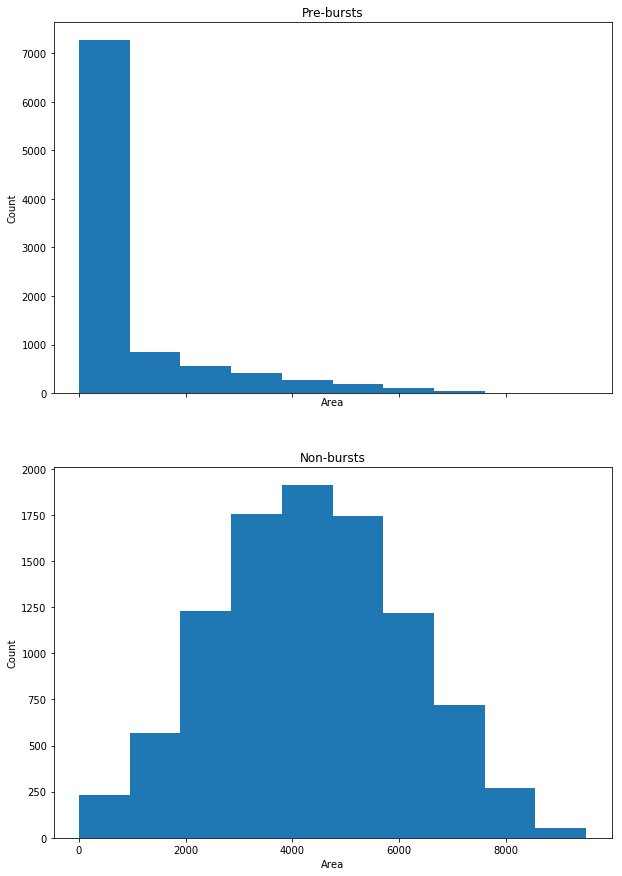

In [11]:
window_size = get_window_size(filename5)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename5)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(
    pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' +
      str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

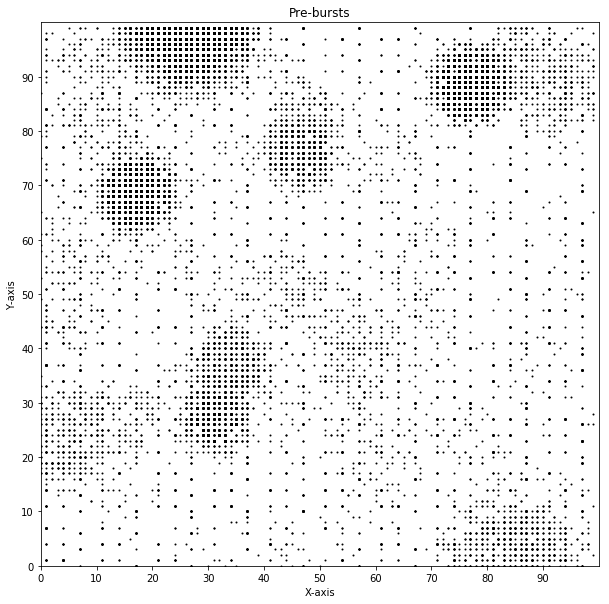

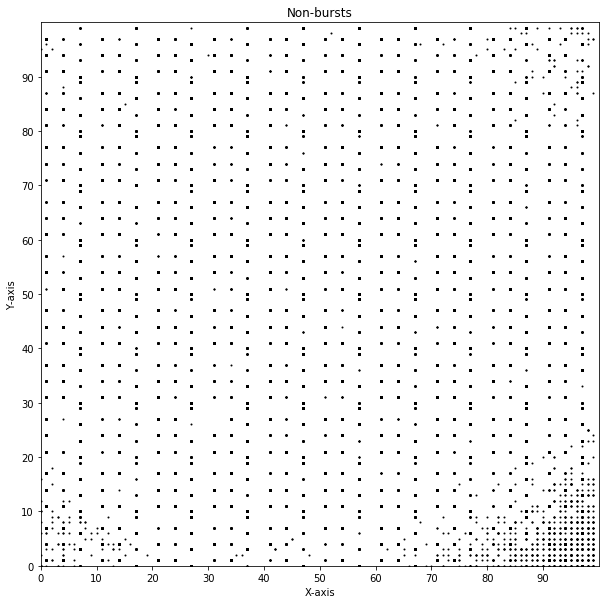

In [12]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

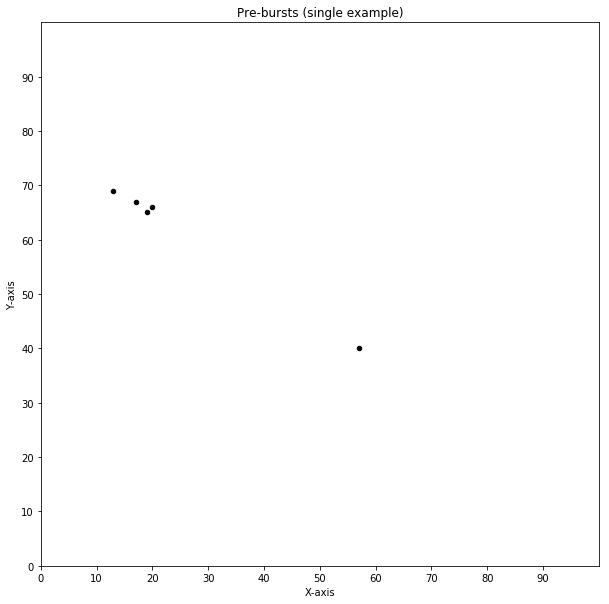

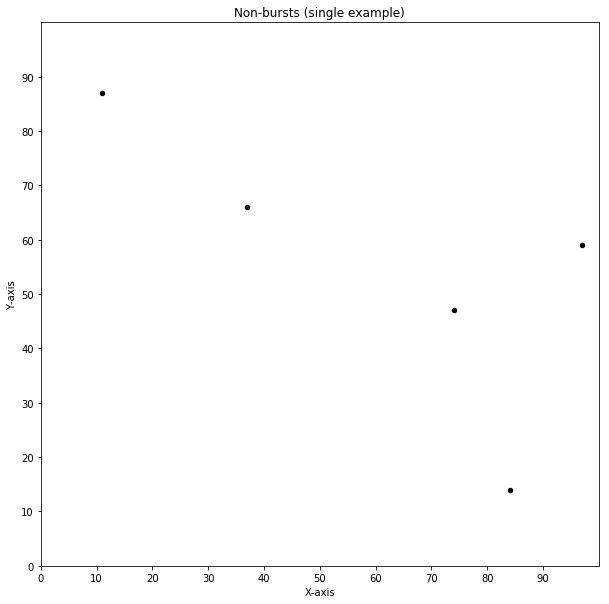

In [13]:
plot_single_scatter(pre_bursts, window_size,
                    'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size,
                    'Non-bursts (single example)', s=20)

Analyzing spike windows of size 10

Mean and standard deviation of the non-burst spike coordinates bounding box area: 6556.284256108877, 1471.162218013035
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 1375.229841204372, 1797.5214018215736


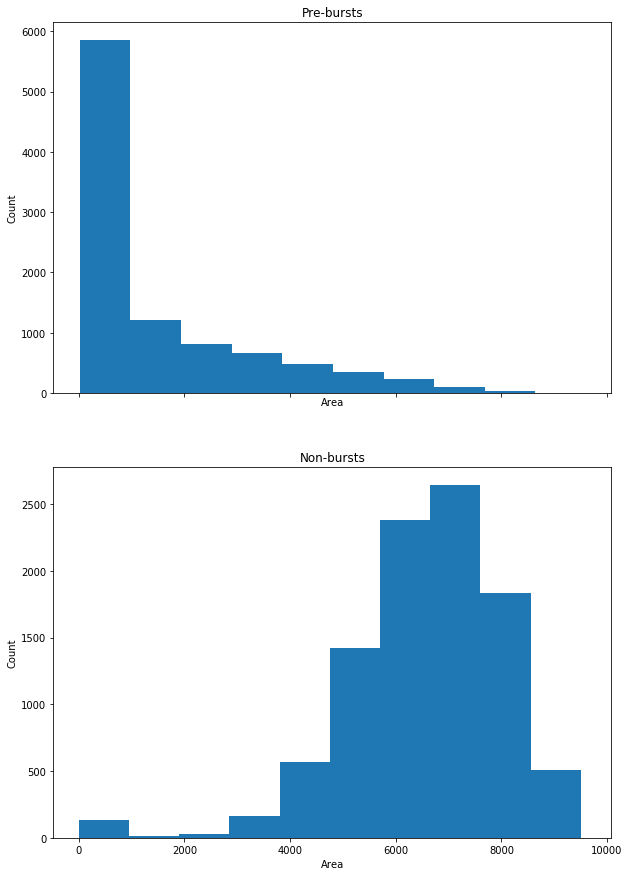

In [14]:
window_size = get_window_size(filename10)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename10)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(
    pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' +
      str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

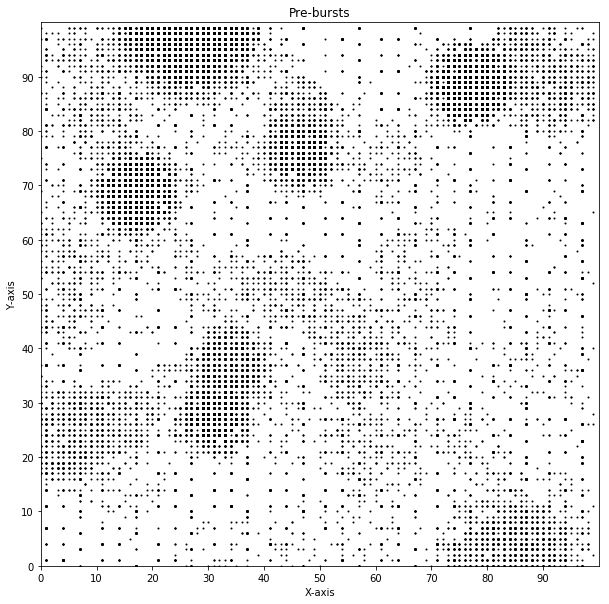

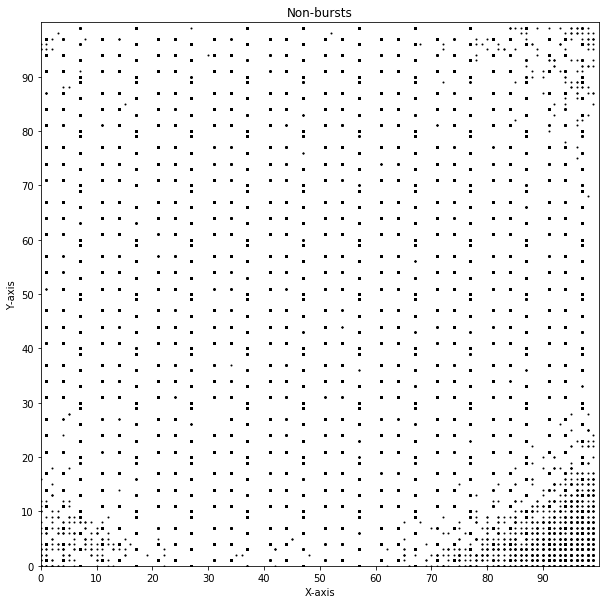

In [15]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

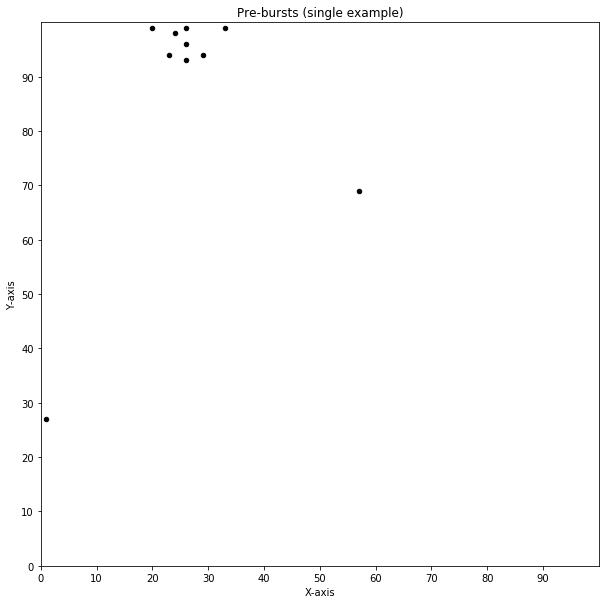

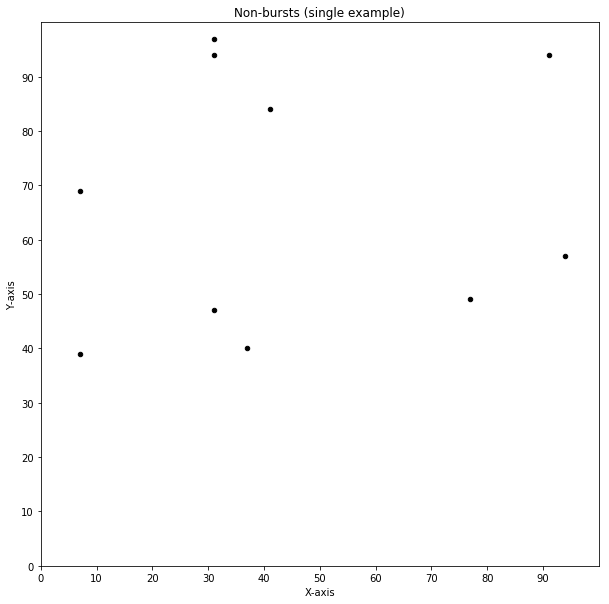

In [16]:
plot_single_scatter(pre_bursts, window_size,
                    'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size,
                    'Non-bursts (single example)', s=20)

Analyzing spike windows of size 50

Mean and standard deviation of the non-burst spike coordinates bounding box area: 8978.946283121972, 912.4801730979622
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 5072.9322540730045, 2416.5127054600216


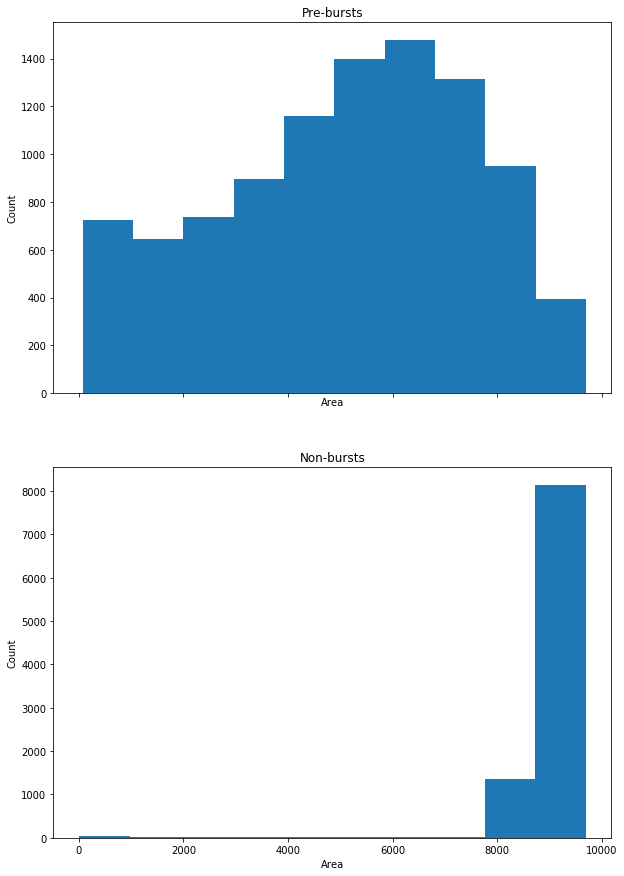

In [17]:
window_size = get_window_size(filename50)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename50)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(
    pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' +
      str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

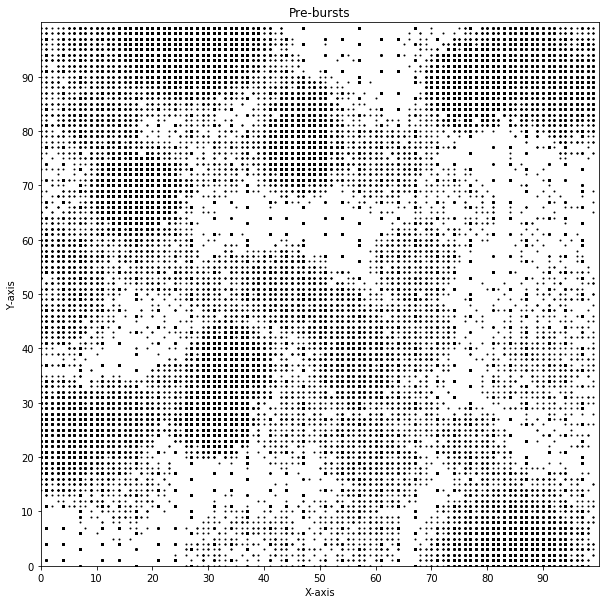

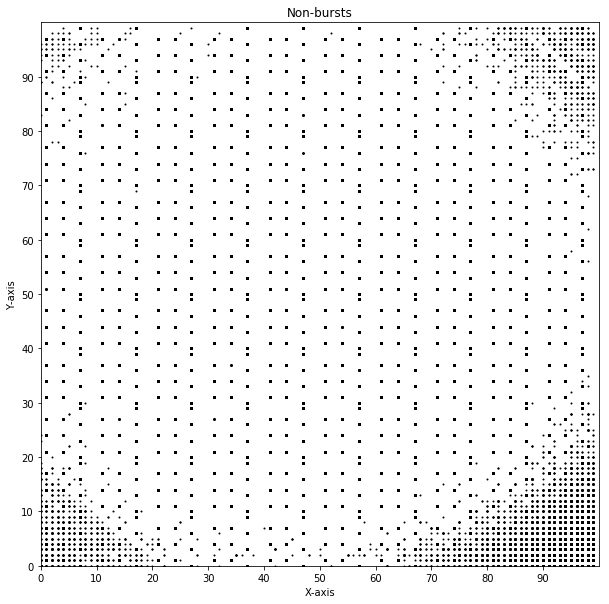

In [18]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

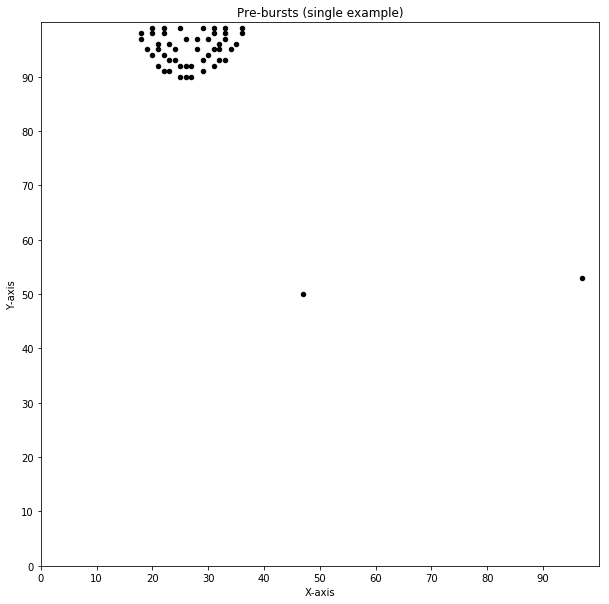

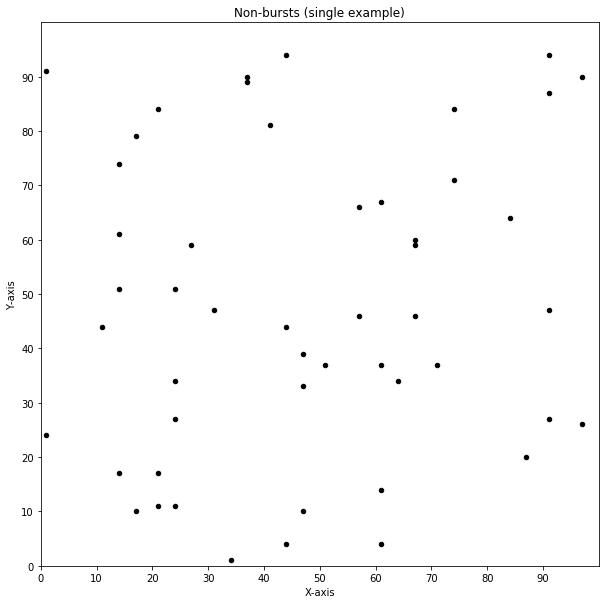

In [19]:
plot_single_scatter(pre_bursts, window_size,
                    'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size,
                    'Non-bursts (single example)', s=20)

Analyzing spike windows of size 100

Mean and standard deviation of the non-burst spike coordinates bounding box area: 9281.29683472523, 754.8708377531591
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 7555.038770880594, 1926.6106799366612


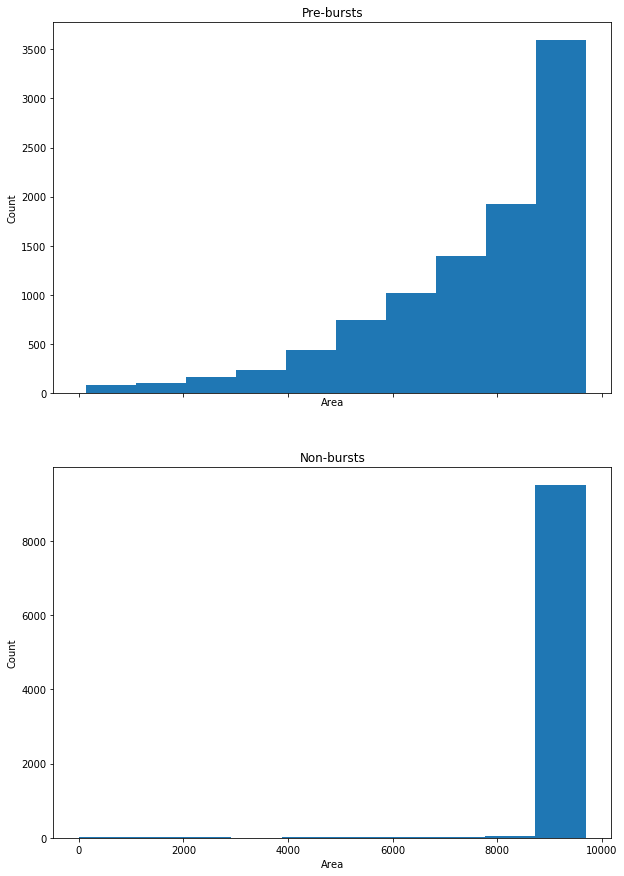

In [20]:
window_size = get_window_size(filename100)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename100)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(
    pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' +
      str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

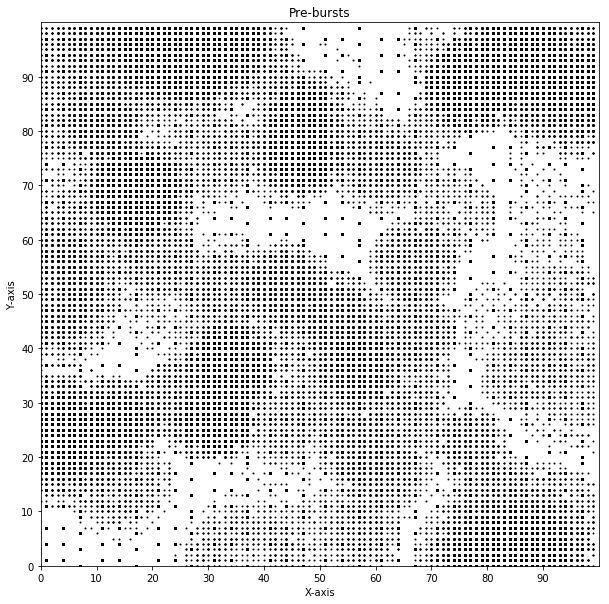

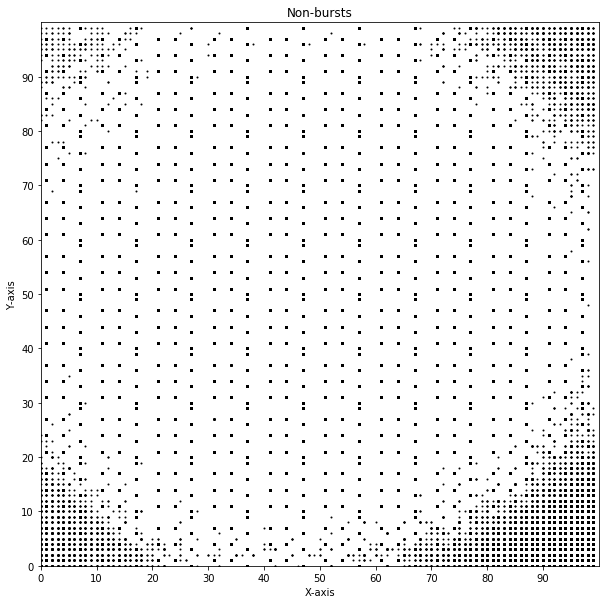

In [21]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

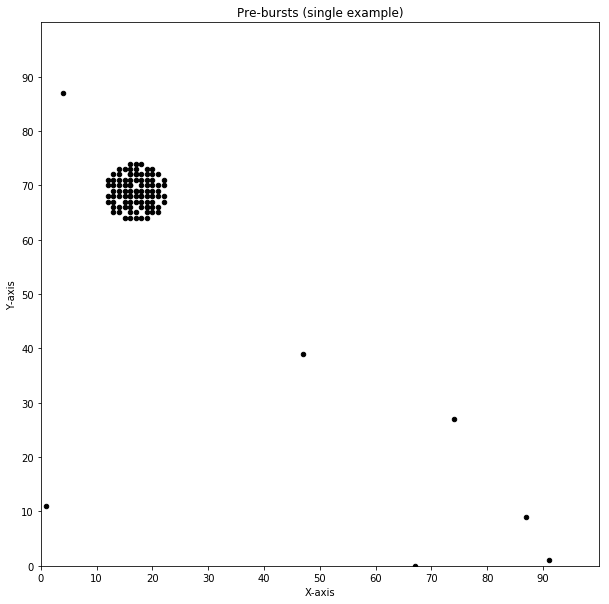

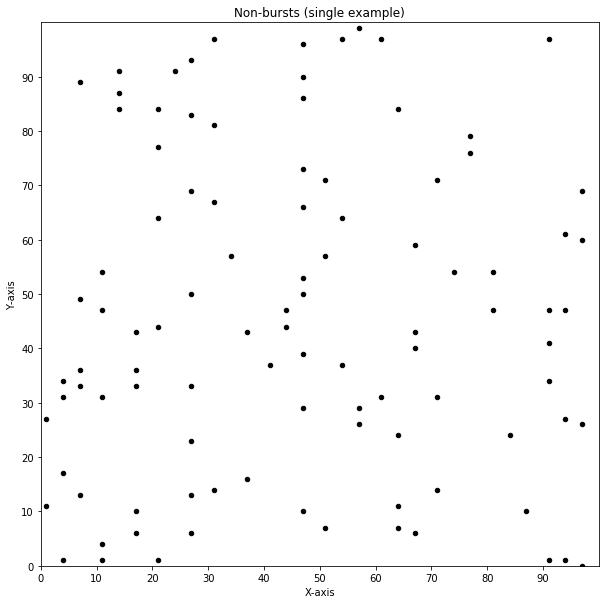

In [22]:
plot_single_scatter(pre_bursts, window_size,
                    'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size,
                    'Non-bursts (single example)', s=20)

Analyzing spike windows of size 500

Mean and standard deviation of the non-burst spike coordinates bounding box area: 9479.519331889886, 312.3101991504244
Mean and standard deviation of the pre-burst spike coordinates bounding box area: 9477.670963085173, 181.93610426345927


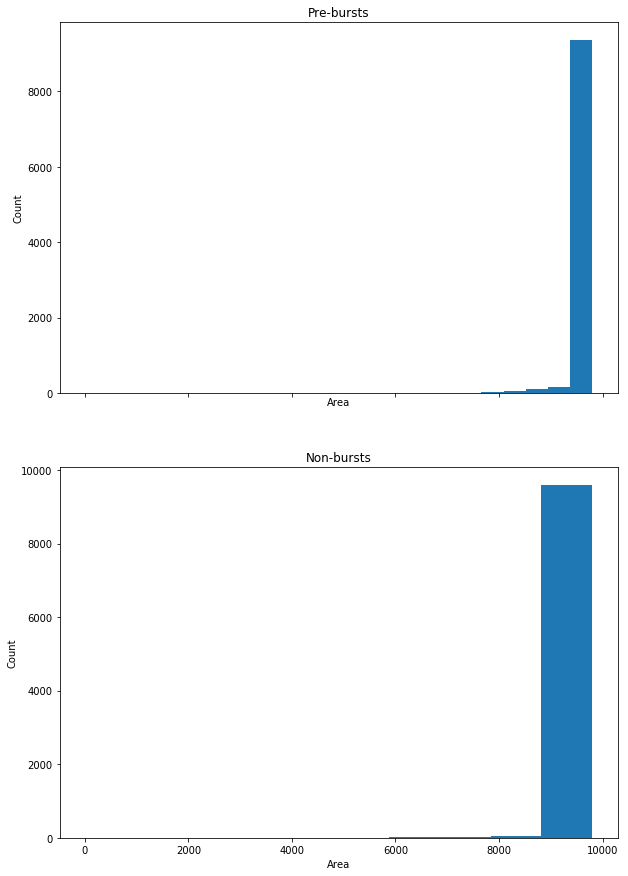

In [23]:
window_size = get_window_size(filename500)
print('Analyzing spike windows of size ' + str(window_size) + '\n')
pre_bursts, non_bursts = prepare_data(filename500)
nb_mean, nb_std, pb_mean, pb_std = area_mean_std(
    pre_bursts, non_bursts, window_size)
print('Mean and standard deviation of the non-burst spike coordinates bounding box area: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of the pre-burst spike coordinates bounding box area: ' +
      str(pb_mean) + ', ' + str(pb_std))
plot_area_histogram(pre_bursts, non_bursts, window_size)

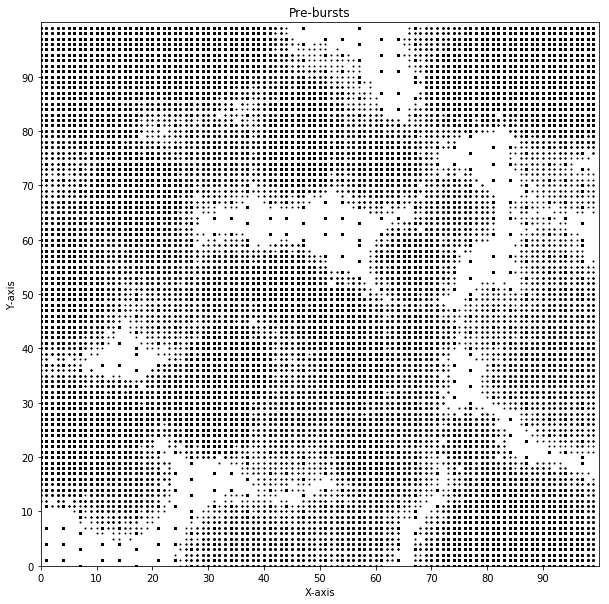

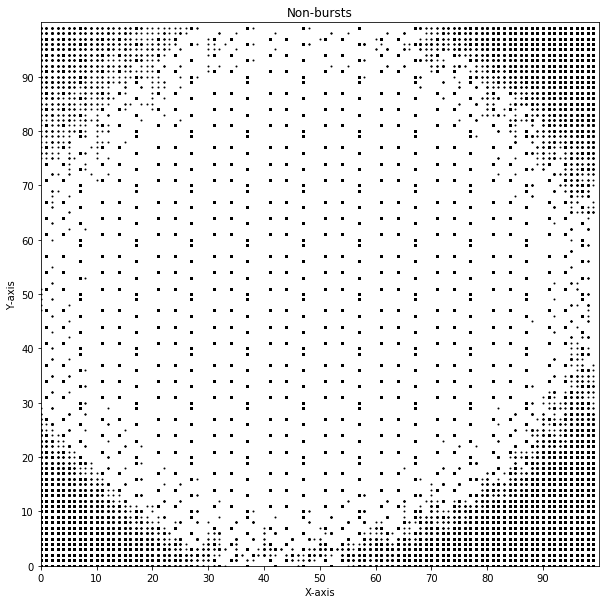

In [24]:
plot_scatter(pre_bursts, window_size, 'Pre-bursts')
plot_scatter(non_bursts, window_size, 'Non-bursts')

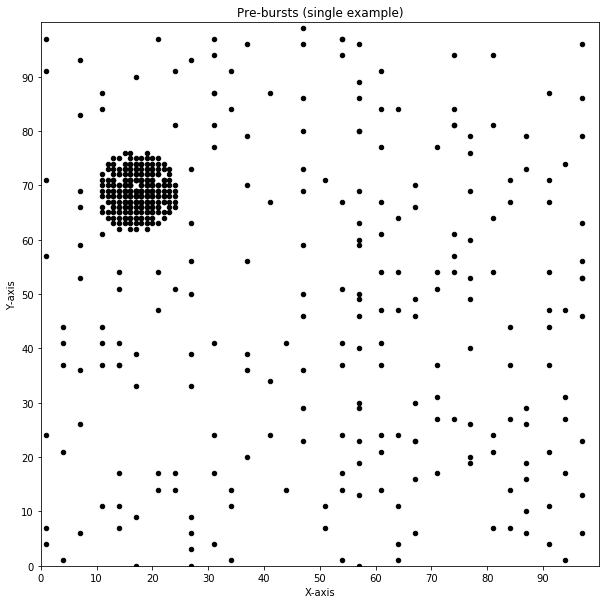

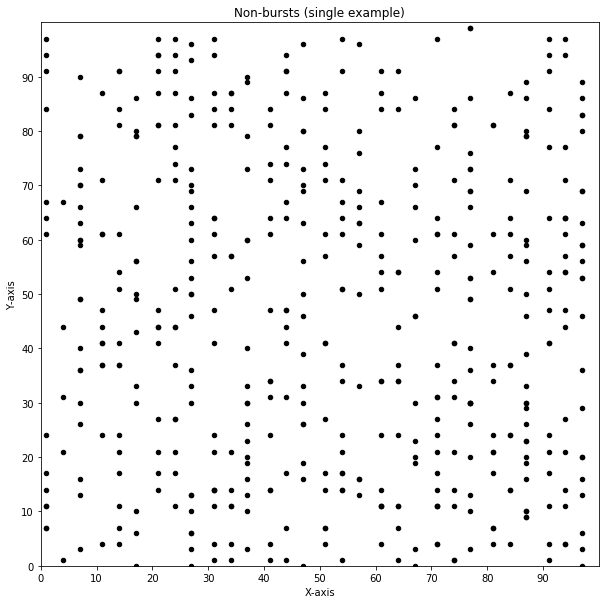

In [25]:
plot_single_scatter(pre_bursts, window_size,
                    'Pre-bursts (single example)', s=20)
plot_single_scatter(non_bursts, window_size,
                    'Non-bursts (single example)', s=20)

It looks like during pre-burst mostly only the starter neurons spike. The pre-burst spike coordinates plots look very similar to the plot of starter neurons.

In [4]:
neurons.rename(columns={0:'xloc', 0.1:'yloc'}, inplace=True)
plot_starter_neurons(neurons)

AttributeError: 'str' object has no attribute 'rename'

In [27]:
t = pd.read_csv('/home/NETID/lundvm/data/neurons.csv')

In [28]:
t

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0
